In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\\Users\\CICD STUDENT\\Desktop\\Data-Analytics-A\\Datasets\\placement.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


<Axes: xlabel='cgpa', ylabel='package'>

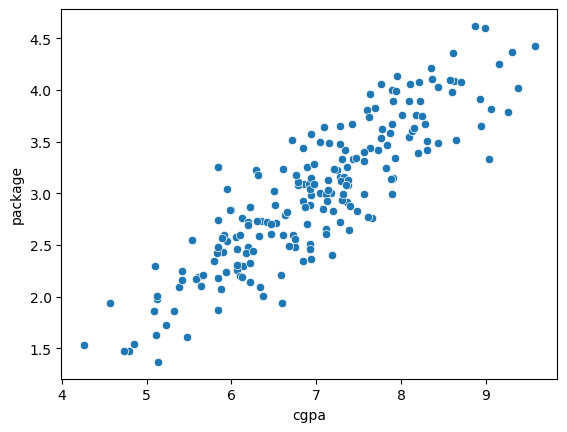

In [3]:
sns.scatterplot(x='cgpa', y='package', data=df)

In [4]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

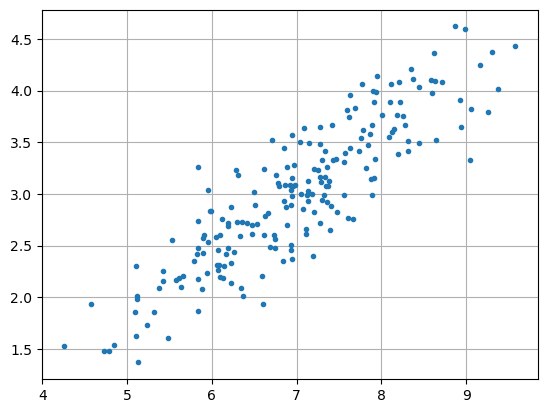

In [5]:
plt.figure()
plt.plot(X, y, '.')
plt.grid()

### Regression

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

# fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
print(f'lr.coef_: {lr.coef_}, lr.intercept_: {lr.intercept_}')

lr.coef_: [0.57425647], lr.intercept_: -1.02700693745421


[2.99278837]
r2: 142.70011220265184
np.std(y_plot): 0.7086813348572121
len(x_plot): 160, len(y_plot): 160, len(y_fit): 160
rmse: 11.945715223570827


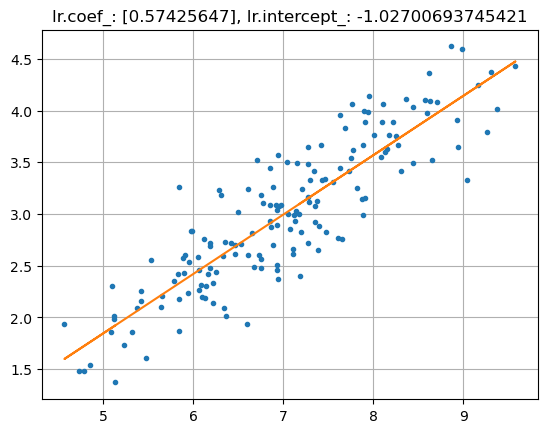

In [11]:
fit_fun = lambda x: lr.coef_ * x + lr.intercept_

x_plot = X_train.to_numpy()
y_plot = y_train.to_numpy()

y_fit = fit_fun(x_plot)

print(fit_fun(7))

plt.figure()
# plt.title(f'lr.coef_: {lr.coef_:0.3f}, lr.intercept_: {lr.intercept_:0.3f}')
plt.title(f'lr.coef_: {lr.coef_}, lr.intercept_: {lr.intercept_}')
plt.plot(x_plot, y_plot, '.')
plt.plot(x_plot, y_fit)
plt.grid()

r2 = np.sum((y_plot - y_fit)**2) / len(y_fit)
print(f'r2: {r2}')
print(f'np.std(y_plot): {np.std(y_plot)}')
print(f'len(x_plot): {len(x_plot)}, len(y_plot): {len(y_plot)}, len(y_fit): {len(y_fit)}')

rmse = np.sqrt(np.sum((y_plot - y_fit)**2) / len(y_fit))
print(f'rmse: {rmse}')

# Linear Regression project

## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll define the terms _machine learning_ and _linear regression_ in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:


> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence. 
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
> 
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers. 
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
medical_df = pd.read_csv(r'C:\\Users\\CICD STUDENT\\Desktop\\Data-Analytics-A\\Datasets\\medical-charges.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
# checking data types for each column

medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


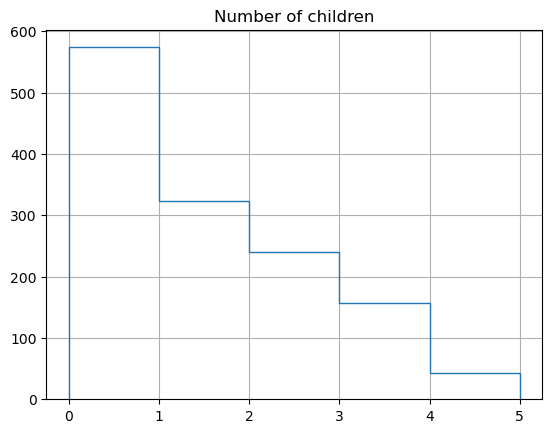

In [8]:
children = medical_df['children']

nmax = children.max()
bins = np.linspace(0, nmax, nmax + 1)

plt.figure()
plt.title(f'Number of children')
plt.hist(children, bins=bins, histtype='step')
plt.grid()

In [9]:
# statistics

medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# checking percentiles

children_list = medical_df['children'].to_list()
children_list_sorted = sorted(children_list)

ind_25 = int(len(children_list_sorted) * 0.25)
print(f'ind_25: {ind_25}')
percentile_25 = children_list_sorted[ind_25]
print(f'25th percentile: {percentile_25}')

ind_75 = int(len(children_list_sorted) * 0.75)
percentile_75 = children_list_sorted[ind_75]
print(f'75th percentile: {percentile_75}')

# median
ind_median = len(children_list_sorted) // 2
median = children_list_sorted[ind_median]
print(f'median: {median}')

ind_25: 334
25th percentile: 0
75th percentile: 2
median: 1


## Exploratory Analysis
Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

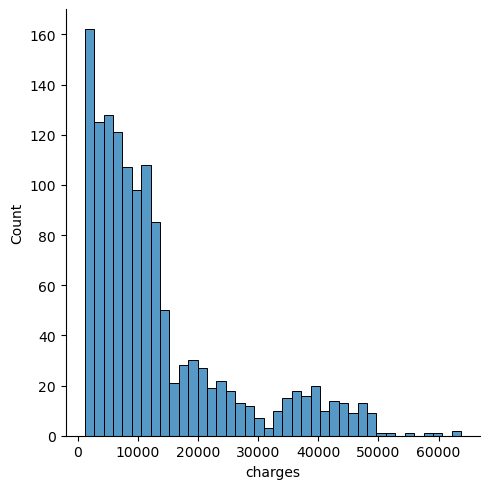

In [75]:
sns.displot(data=medical_df, x='charges', bins=40)

<Figure size 1600x400 with 0 Axes>

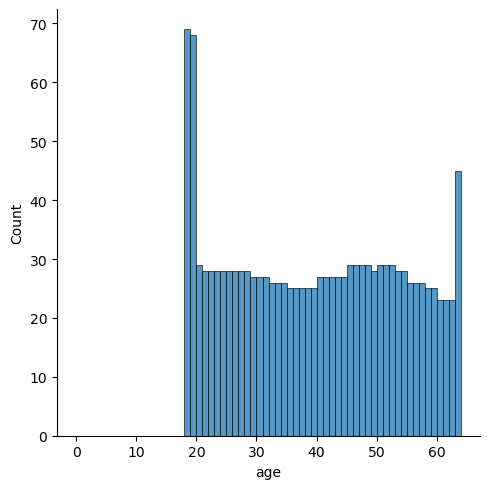

In [11]:
plt.figure(figsize=(16, 4))
bins = np.linspace(0, max(medical_df.age), max(medical_df.age) + 1)
sns.displot(data = medical_df, x = 'age', bins=bins)
# sns.displot(data=medical_df, x='age', bins=47)

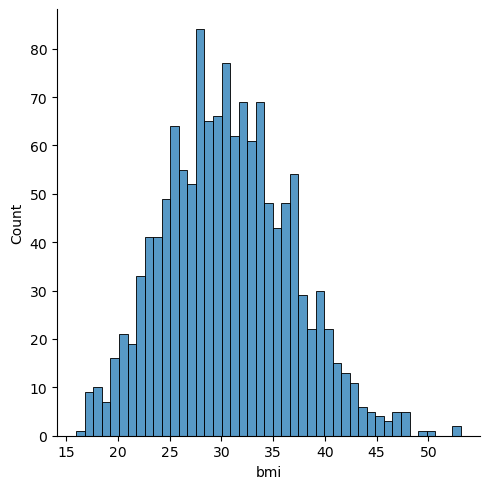

In [12]:
sns.displot(data=medical_df, x='bmi', bins=45)

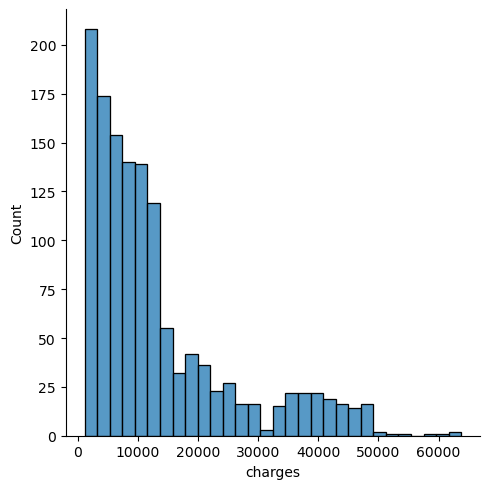

In [13]:
# visualizing charges - annual medical charges for customers

sns.displot(data=medical_df, x='charges')

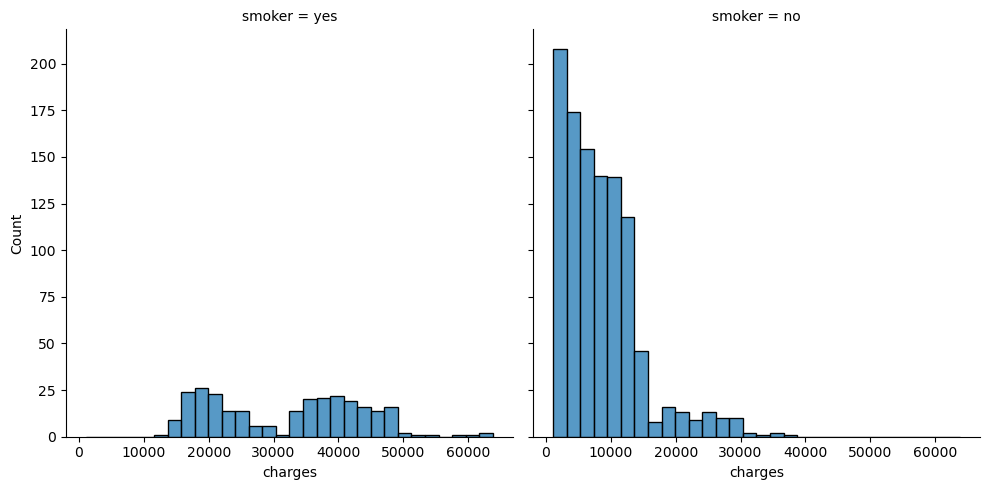

In [14]:
# how much does the annual premium vary for smokers vs non smokers

sns.displot(data=medical_df, x='charges', col='smoker')

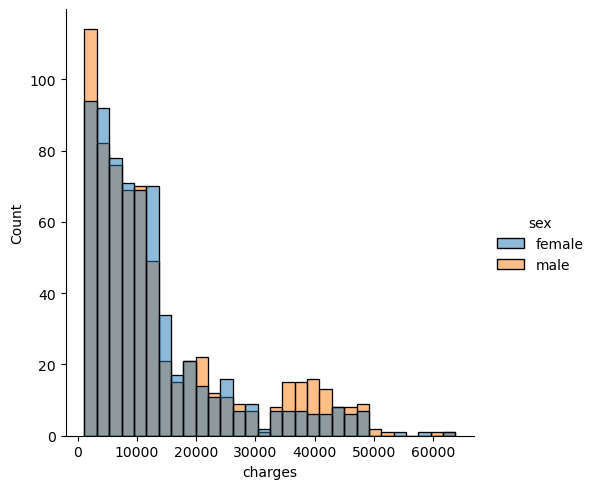

In [15]:
# premium in comparison to sex

sns.displot(data=medical_df, x='charges', hue='sex')

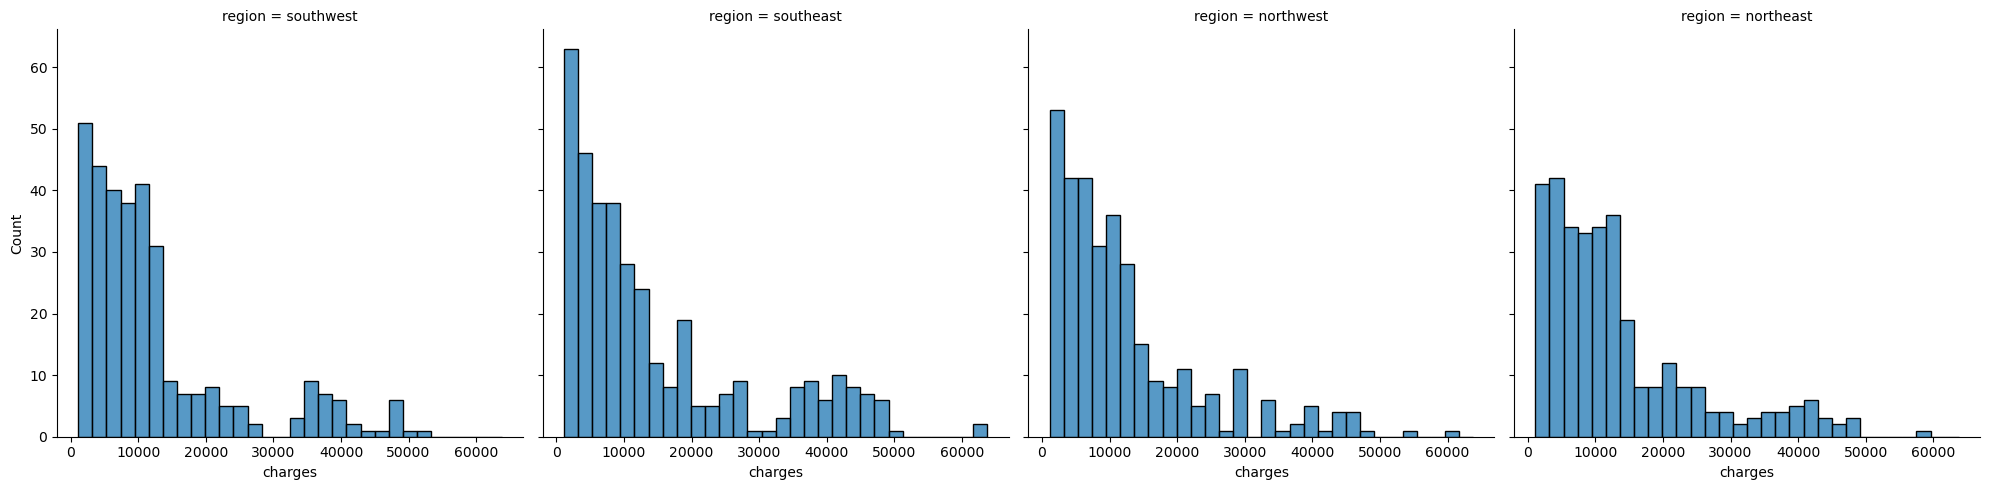

In [76]:
# premium in comparison to region

sns.displot(data=medical_df, x='charges', col='region')

In [18]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
medical_df.groupby('smoker').median('charges')

,age,bmi,children,charges
smoker,,,,
no,40.0,30.3525,1.0,7345.40530
yes,38.0,30.4475,1.0,34456.34845


### Smoker

In [20]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

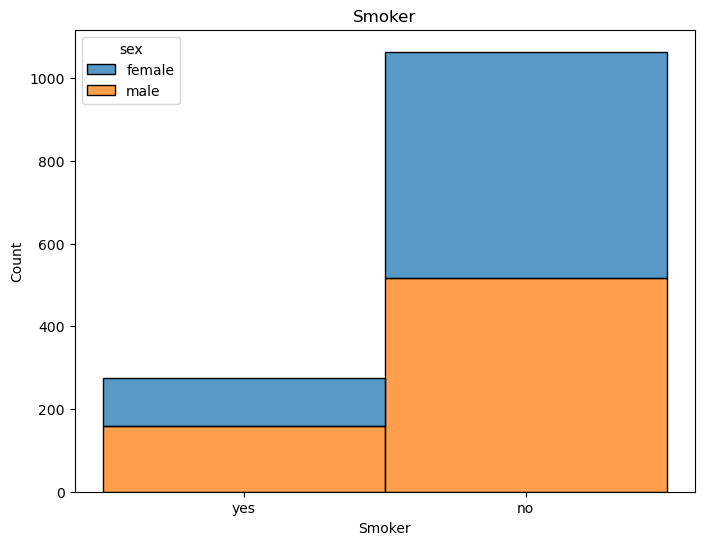

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(data=medical_df, x='smoker', hue='sex', multiple='stack')
# sns.histplot(data=medical_df, x='smoker', hue='sex')
plt.title('Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

> **EXERCISE**: Visualize the distributions of the "sex", "region" and "children" columns and report your observations. 

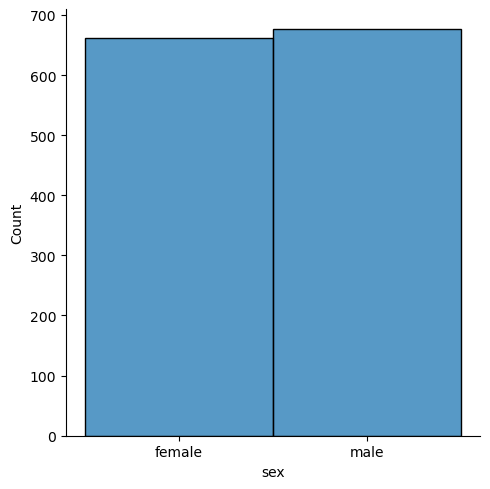

In [22]:
sns.displot(data=medical_df, x='sex')

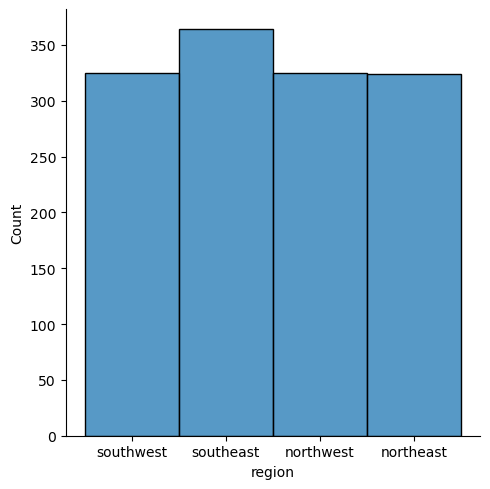

In [23]:
sns.displot(data=medical_df, x='region')

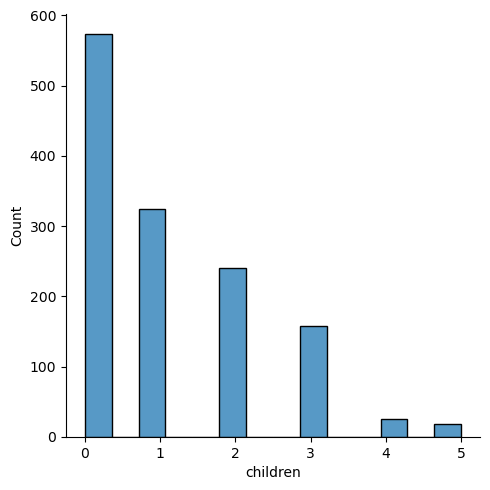

In [24]:
sns.displot(data=medical_df, x='children')

(array([574., 324., 240., 157.,  43.]),
 array([0., 1., 2., 3., 4., 5.]),
 [<matplotlib.patches.Polygon at 0x176183f4410>])

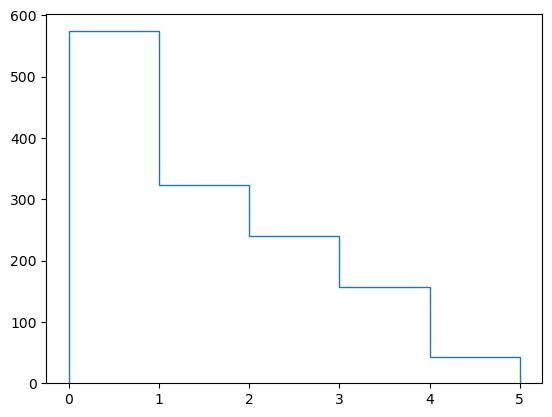

In [25]:
nmax = children.max()
bins = np.linspace(0, nmax, nmax + 1)

plt.figure()
plt.hist(children, bins=bins, histtype='step')

### Age and premiums
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

<Axes: xlabel='age', ylabel='charges'>

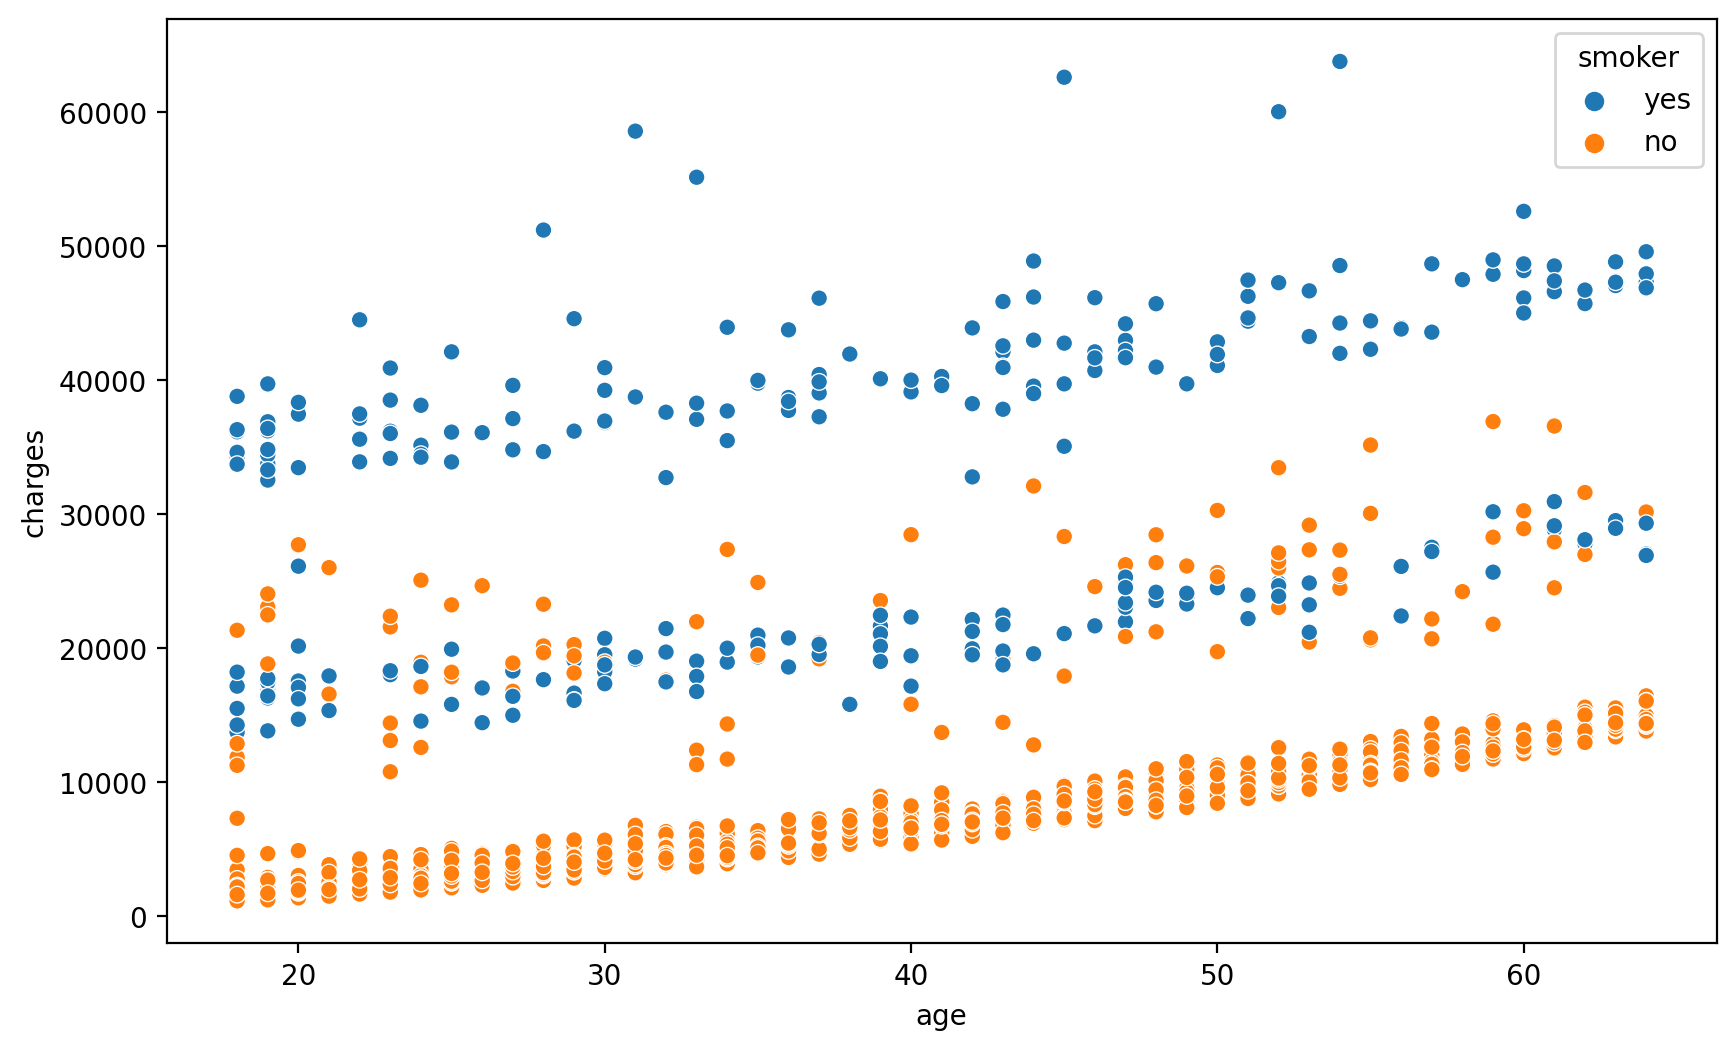

In [26]:
plt.figure(figsize=(10, 6), dpi=200)
sns.scatterplot(data=medical_df, x='age', y='charges', hue='smoker')

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest (bottom) cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second (middle) cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final (top) cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

### BMI and premiums

<Axes: xlabel='bmi', ylabel='charges'>

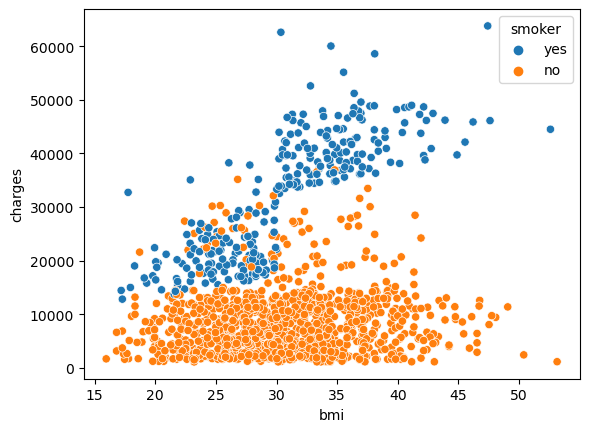

In [28]:
sns.scatterplot(data=medical_df, x='bmi', y='charges', hue='smoker')

In [85]:
bmi30 = medical_df[medical_df['bmi'] > 30]
bmi30_smoker = bmi30[bmi30['smoker'] == 'yes']
bmi30_smoker

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,36397.57600


In [87]:
bmi30 = medical_df[medical_df['bmi'] > 30]
bmi30_smoker = bmi30[bmi30['smoker'] == 'yes']
bmi30_smoker.sex.value_counts()

male      92
female    52
Name: sex, dtype: int64

> **EXERCISE**: Create some more graphs to visualize how the "charges" column is related to other columns ("children", "sex", "region" and "smoker"). Summarize the insights gathered from these graphs.
>
> *Hint*: Use violin plots (`px.violin`) and bar plots (`sns.barplot`)


Children, sex, and region by themselves don't have a clear correlation to charges.

<Axes: xlabel='smoker', ylabel='charges'>

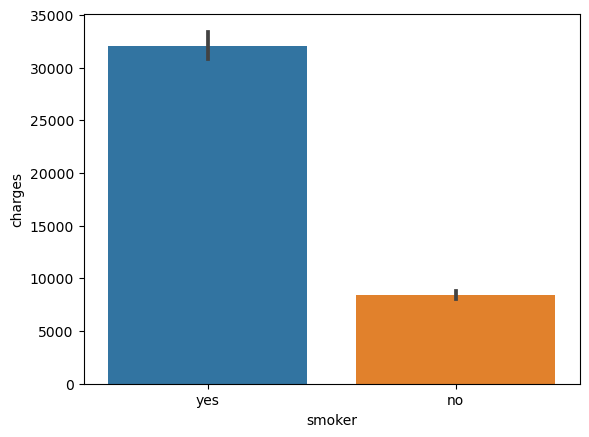

In [30]:
sns.barplot(data=medical_df, x='smoker', y='charges')

### Correlation

In [31]:
# correlation for the entire dataframe

medical_df.corr()

C:\Users\CICD STUDENT\AppData\Local\Temp\ipykernel_8840\4290363667.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  medical_df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [33]:
# correlation between age and premiums

medical_df.charges.corr(medical_df.age)

0.29900819333064765

In [35]:
# correlation between bmi and premiums

medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [37]:
# correlation between smoking and premiums

# convert categorical smoker column into numerical
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)

# compute correlation
medical_df.charges.corr(smoker_numeric)

0.7872514304984772

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

In [38]:
# computing the correlation matrix

medical_df.corr()

C:\Users\CICD STUDENT\AppData\Local\Temp\ipykernel_8840\4290363667.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  medical_df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


C:\Users\CICD STUDENT\AppData\Local\Temp\ipykernel_8840\1913085235.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)


Text(0.5, 1.0, 'Correlation matrix')

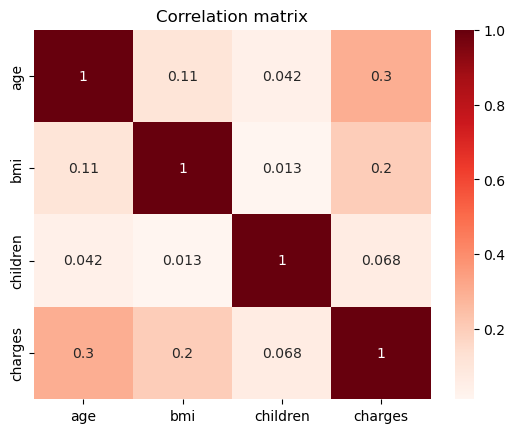

In [39]:
# visualizing result of the correlation matrix

sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation matrix')

In [148]:
# create dataframe from non-smokers data

non_smoker_df = medical_df[medical_df['smoker'] == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: xlabel='age', ylabel='charges'>

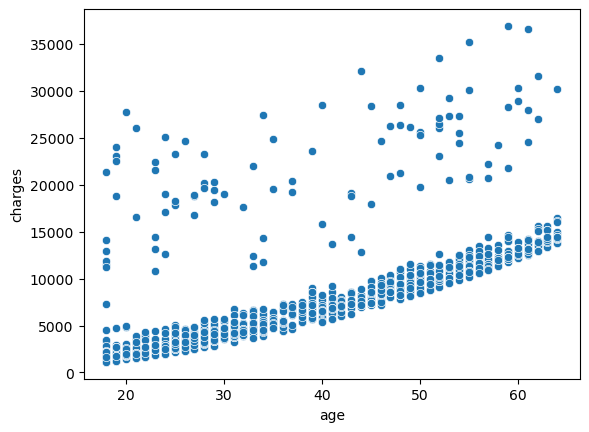

In [42]:
sns.scatterplot(data=non_smoker_df, x='age', y='charges')

### Linear Regression using Scikit-learn

Using the `LinearRegression` class from `scikit-learn` to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# create model object
model_ns = LinearRegression()

# define X and y
X_ns = non_smoker_df[['age']]
y_ns = non_smoker_df.charges
# print(f'X.shape: {X.shape}')
# print(f'y.shape: {y.shape}')

# train/test split
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_ns, y_ns, test_size=0.2, random_state=101)
X_train_ns

,age
651,53
1064,29
709,36
121,18
140,34
...,...
715,60
1217,29
102,18
747,19


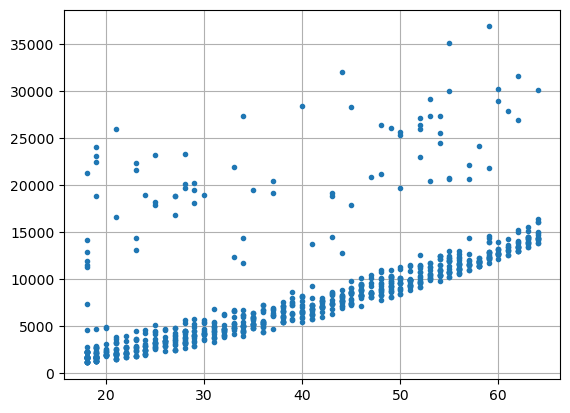

In [160]:
# plt.plot(X, y, '.')
plt.plot(X_train_ns, y_train_ns, '.')
plt.grid()

In [161]:
# use the fit method of the model to find the best fit line for the inputs and targets on train dataset
model_ns.fit(X_train_ns, y_train_ns)

LinearRegression()

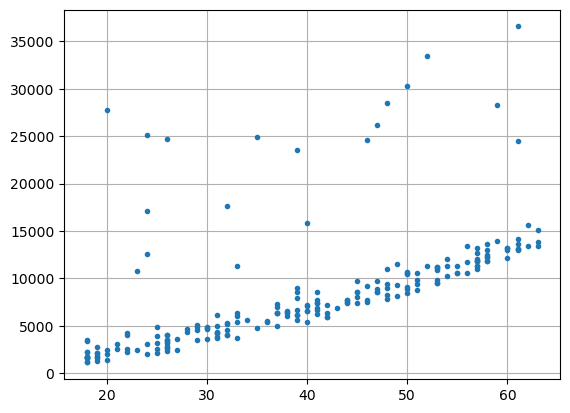

In [162]:
plt.plot(X_test_ns, y_test_ns, '.')
plt.grid()

In [163]:
# compute the predictions for all inputs in the test dataset

y_pred_ns = model.predict(X_test_ns)
y_pred_ns

array([ 6712.18086958,  4310.92407341,  8846.63135506,  7512.59980163,
        5111.34300547,  4844.53669478, 11514.69446191,  6445.37455889,
        9647.05028711, 11781.50077259, 10714.27552985, 14449.56387944,
        9647.05028711,  6445.37455889, 14182.75756876,  2710.0862093 ,
       13382.3386367 , 10981.08184054,  2976.89251999, 14182.75756876,
        2710.0862093 ,  6712.18086958,  8846.63135506,  8579.82504437,
       12315.11339396,  5644.95562684, 10714.27552985,  7512.59980163,
        6178.56824821,  8313.01873369, 14716.37019013,  4310.92407341,
       13382.3386367 ,  9913.8565978 , 13915.95125807,  2710.0862093 ,
       11247.88815122,  8846.63135506, 10180.66290848,  4577.7303841 ,
        5911.76193752,  9647.05028711,  8846.63135506, 11781.50077259,
        4844.53669478,  7779.40611232,  7779.40611232,  5378.14931615,
        2710.0862093 , 12848.72601533, 13915.95125807, 13382.3386367 ,
       12048.30708328, 11514.69446191,  7245.79349095,  8579.82504437,
      

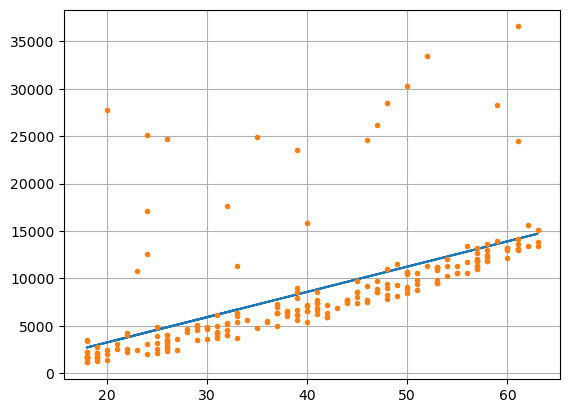

In [164]:
plt.plot(X_test_ns, y_pred_ns)
plt.plot(X_test_ns, y_test_ns, '.')
plt.grid()

In [71]:
print(f'y.shape: {y.shape}, type(y): {type(y)}')
print(f'y_pred.shape: {y_pred.shape}, type(y_pred): {type(y_pred)}')

y.shape: (1064,), type(y): <class 'pandas.core.series.Series'>
y_pred.shape: (213,), type(y_pred): <class 'numpy.ndarray'>


In [165]:
# computing RMSE loss to evaluate the model for non-smokers

def rmse(targets, predictions):
    if len(targets) != len(predictions):
        print(f'***Error: len(targets) = {len(targets)}, len(predictions) = {len(predictions)}')
        return None

    return np.sqrt(np.mean(np.square(targets - predictions)))

rmse(y_test_ns, y_pred_ns)

5028.1559880234945

In [166]:
# computing r2 score for non-smokers

from sklearn.metrics import r2_score

r2_score = r2_score(y_test_ns, y_pred_ns)  # need to have same dimensions
r2_score

0.34541465793093196

In [167]:
# getting model parameters for non_smokers

print(f'model_ns.coef_: {model_ns.coef_}')
model_ns.intercept_

model_ns.coef_: [266.80631069]


-2092.427383028611

### creating and fitting model for combined smokers and non-smokers

In [168]:
medical_df = pd.read_csv(r'C:\\Users\\CICD STUDENT\\Desktop\\Data-Analytics-A\\Datasets\\medical-charges.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [169]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [170]:
# converting categorical columns into numerical columns

medical_cat_df = pd.get_dummies(medical_df[['sex', 'smoker', 'region', 'charges']])
print(medical_cat_df.columns)
medical_cat_df

Index(['charges', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')


,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,16884.92400,1,0,0,1,0,0,0,1
1,1725.55230,0,1,1,0,0,0,1,0
2,4449.46200,0,1,1,0,0,0,1,0
3,21984.47061,0,1,1,0,0,1,0,0
4,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,10600.54830,0,1,1,0,0,1,0,0
1334,2205.98080,1,0,1,0,1,0,0,0
1335,1629.83350,1,0,1,0,0,0,1,0
1336,2007.94500,1,0,1,0,0,0,0,1


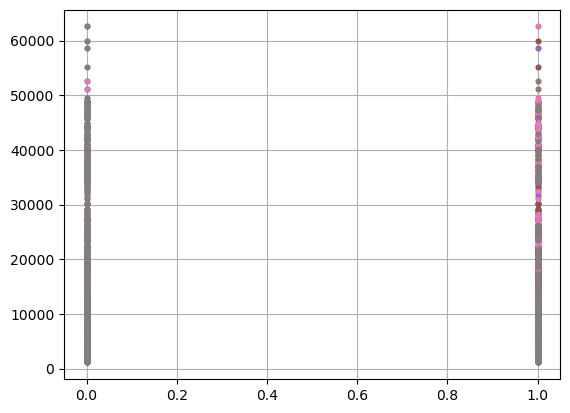

In [178]:
X_comb = medical_cat_df.drop('charges', axis=1)
y_comb = medical_cat_df['charges']
X_train_comb, X_test_comb, y_train_comb, y_test_comb = train_test_split(X_comb, y_comb, test_size=0.2, random_state=42)

model_combined = LinearRegression()

plt.plot(X_train_comb, y_train_comb, '.')
plt.grid()

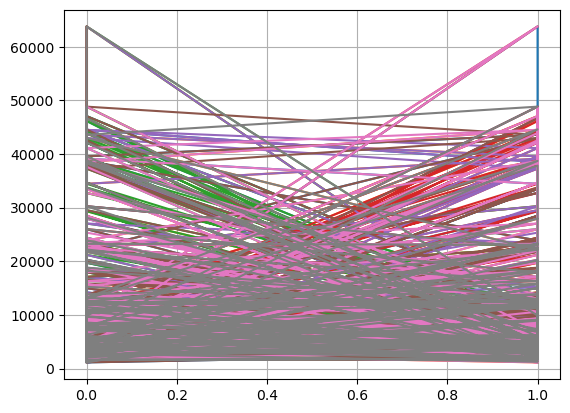

In [179]:
plt.plot(X_test_comb, y_test_comb)
plt.grid()

In [180]:
# fitting model (train dataset)
model_combined.fit(X_train_comb, y_train_comb)

LinearRegression()

In [181]:
# predictions for combined smokers and non-smokers
y_pred_comb = model_combined.predict(X_test_comb)
y_pred_comb

array([ 8336.,  8352., 31520.,  8352., 31520.,  8464.,  8352.,  8352.,
        8336.,  8352., 31632.,  8352.,  9104., 32272., 32272., 32272.,
        9104., 32272.,  9104., 31520.,  8464.,  8464.,  8464.,  8336.,
        8352.,  8336.,  8464.,  8352.,  8336.,  9104.,  8464.,  8352.,
        9104.,  8352.,  8464.,  8336.,  8464.,  8464., 31520., 32272.,
        8464.,  8352.,  8464.,  8352.,  9104.,  8464.,  8352.,  8464.,
       32272.,  9104.,  9104.,  9104.,  8352.,  8336.,  9104.,  8336.,
        8336., 31520.,  8464.,  8336.,  8464.,  9104.,  8464.,  8352.,
        8336.,  8352., 31632.,  9104.,  8352.,  8464.,  8336.,  8336.,
        9104.,  9104.,  9104.,  9104.,  8336.,  8352.,  9104.,  8464.,
        9104., 31504.,  8464., 31504., 32272., 31504.,  9104.,  8352.,
        8352.,  8464.,  8336., 32272., 31504.,  8336., 32272.,  8464.,
       32272.,  9104., 31520.,  8336.,  8352.,  8464.,  9104.,  8464.,
        8336.,  9104.,  9104., 32272.,  8336., 32272.,  8464.,  9104.,
      

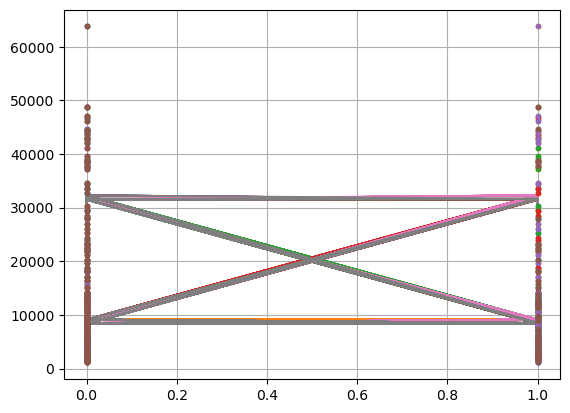

In [182]:
plt.plot(X_test_comb, y_pred_comb)
plt.plot(X_test_comb, y_test_comb, '.')
plt.grid()

In [183]:
# computing RMSE loss to evaluate the model (combined smokers and non-smokers)

def rmse(targets, predictions):
    if len(targets) != len(predictions):
        print(f'***Error: len(targets) = {len(targets)}, len(predictions) = {len(predictions)}')
        return None

    return np.sqrt(np.mean(np.square(targets - predictions)))

rmse(y_test_comb, y_pred_comb)

7276.2804148699115

In [184]:
# computing r2 score for entire dataset

from sklearn.metrics import r2_score

r2_score_comb = r2_score(y_test_comb, y_pred_comb)  # need to have same dimensions
r2_score_comb

0.658971405646397

In [167]:
# getting model parameters for non_smokers

print(f'model_ns.coef_: {model_ns.coef_}')
model_ns.intercept_

model_ns.coef_: [266.80631069]


-2092.427383028611

In [175]:
# getting model parameters - combined smokers and non-smokers

print(f'model_combined.coef_ for combined smoker and non-smoker data: {model_combined.coef_}')
model_combined.intercept_

model_combined.coef_ for combined smoker and non-smoker data: [-6.84667881e+16 -6.84667881e+16  3.83981367e+16  3.83981367e+16
  1.09787419e+17  1.09787419e+17  1.09787419e+17  1.09787419e+17]


-7.971876747343437e+16

## Since we get weird plots for combined dataset, linear regression using multiple regression

### Adding bmi to age for non-smokers

In [186]:
# create dataframe for non-smokers

non_smoker_df = medical_df[medical_df['smoker'] == 'no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [190]:
# create inputs and targets

X = non_smoker_df[['age', 'bmi']]
y = non_smoker_df['charges']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

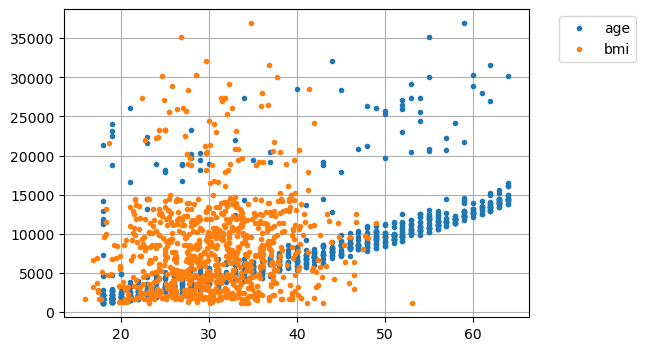

In [196]:
# plot train dataset

plt.figure(figsize=(6,4))
plt.plot(X_train, y_train, '.')
plt.legend(['age', 'bmi'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()

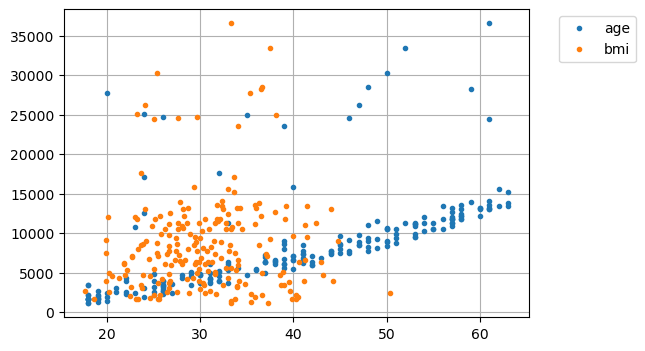

In [197]:
# plot test dataset

plt.figure(figsize=(6,4))
plt.plot(X_test, y_test, '.')
plt.legend(['age', 'bmi'], bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid()

In [198]:
# fitting model

model_age_bmi = LinearRegression()
model_age_bmi.fit(X_train, y_train)

LinearRegression()

In [199]:
# predictions

y_pred = model_age_bmi.predict(X_test)

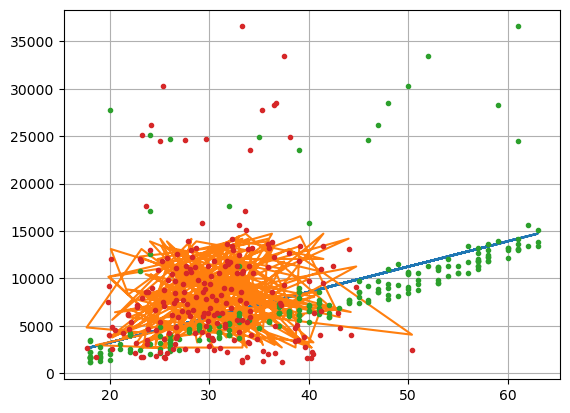

In [200]:
# plotting test dataset, predictions - multiple orange lines due to addition of bmi

plt.plot(X_test, y_pred)
plt.plot(X_test, y_test, '.')
plt.grid()

Linear regression plot is going to be hard to interpret, so choosing to move on

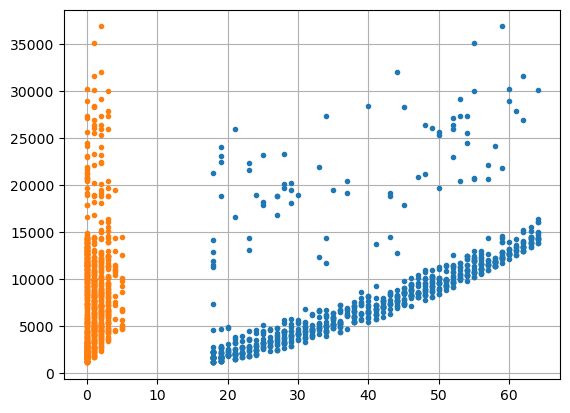

In [202]:
# age, children

X = non_smoker_df[['age', 'children']]
y = non_smoker_df['charges']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# plotting train dataset
plt.plot(X_train, y_train, '.')
plt.grid()

We can see that one model is not enough to describe the above dataset

## Using categorical features
### Binary categories

In [219]:
medical_df = pd.read_csv(r'C:\\Users\\CICD STUDENT\\Desktop\\Data-Analytics-A\\Datasets\\medical-charges.csv')


smoker_code = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df['smoker'].map(smoker_code)

medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [210]:
# correlation

print(medical_df.charges.corr(medical_df.smoker_code))
medical_df.groupby('smoker_code').corr()

0.7872514304984772


C:\Users\CICD STUDENT\AppData\Local\Temp\ipykernel_8840\708881549.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medical_df.groupby('smoker_code').corr()


age       bmi  children   charges
smoker_code                                                 
0           age       1.000000  0.122638  0.033395  0.627947
            bmi       0.122638  1.000000  0.019208  0.084037
            children  0.033395  0.019208  1.000000  0.138929
            charges   0.627947  0.084037  0.138929  1.000000
1           age       1.000000  0.059674  0.081183  0.368224
            bmi       0.059674  1.000000 -0.012619  0.806481
            children  0.081183 -0.012619  1.000000  0.035945
            charges   0.368224  0.806481  0.035945  1.000000

We can use smoker_df column for linear regression

In [213]:
sex_code = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df['sex'].map(sex_code)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [214]:
# correlation of bmi and premiums
medical_df.charges.corr(medical_df.bmi)

0.19834096883362892

In [215]:
# correlation of sex and premiums
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025415

In [220]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [221]:
# create inputs and targets
X = medical_df[['age', 'children', 'smoker_code']]
y = medical_df['charges']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# create model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

LinearRegression()

In [222]:
# generate predictions
y_pred = model.predict(X_test)

# calculate loss
loss = rmse(y_test, y_pred)
print(f'loss: {loss}')

# get model parameters
coef = model.coef_
print(f'coefficient: {coef}')
intercept = model.intercept_
print(f'intercept: {intercept}')

loss: 5903.211157769644
coefficient: [  260.12020116   446.22906581 23651.20870681]
intercept: -2291.628717336009


For the combined smokers and non-smokers data we get a better fit (model.coef_ of about 260.1) vs non-smokers only (model.coef_ of about 266.8)

## What if programmer forgets train/test split

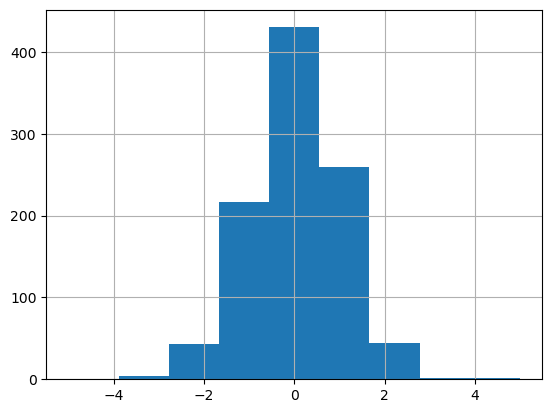

In [133]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
data = np.random.normal(0, 1, 1000)

bins = np.linspace(-5, 5, 10)

plt.figure()
plt.hist(data, bins=bins)
plt.grid()

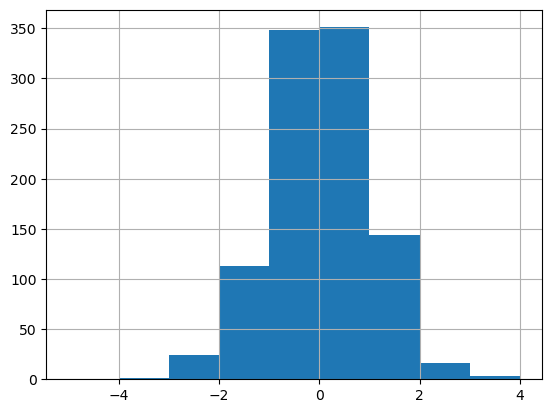

In [134]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
data = np.random.normal(0, 1, 1000)

bins = np.arange(-5, 5, 1)

plt.figure()
plt.hist(data, bins=bins)
plt.grid()

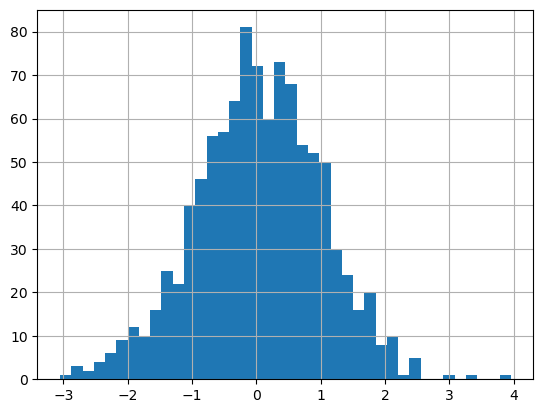

In [138]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
data = np.random.normal(0, 1, 1000)

plt.figure()
plt.hist(data, bins=40)
plt.grid()

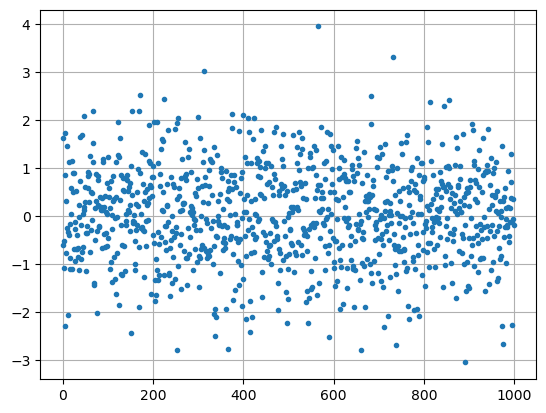

In [139]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
data = np.random.normal(0, 1, 1000)

plt.figure()
plt.plot(data, '.')
plt.grid()

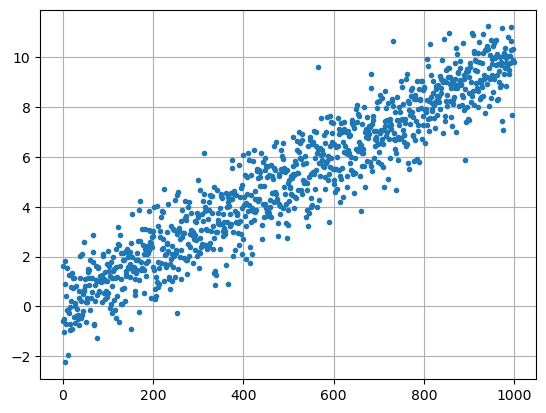

In [143]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
y_flat = np.random.normal(0, 1, 1000)

k = 0.01
b = 0

x = np.array(range(len(y_flat)))
y = y_flat + k * x + b

plt.figure()
plt.plot(x, y, '.')
plt.grid()